# Customer segmentation - K-Means using (Scikit) 
> Cluster customers using K-Means. 

- toc: false 
- badges: true
- comments: false
- categories: [jupyter, seaborn, sklearn, KMeans]
- author: Venkataramani, Suja

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt

## Overview

Customer segmentation involves spliting the data points into logical groups - useful in customising products to suit the needs of the group. We will first decide the number of groups by using the elbow method. We will then split the dataset into groups and analyse the grouping by visualising the data using matplot lib.

## Method

The dataset can be downloaded from [Kaggle](https://www.kaggle.com/akram24/mall-customers). We will begin by understanding the data and visualising it using seaborn, a graphical package in Python. Then will split the data into 2, 3...10 groups and measure the sum of mean squared values and decide on the number of groups using the Elbow method using Scikit Learn. 

To install seaborn, run the following command on command prompt:  
pip install seaborn

In [3]:
# Read the customer data.
data = pd.read_csv(".\data\Mall_Customers.csv")

In [8]:
# Data has 200 rows and 5 columns.
data.shape

(200, 5)

In [9]:
# Customer is identified with an Id and has details of Gender, Age, Income and Spending score.
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# Top level statistics tells us there are no null values.
# Mean, min and max values tell us the range of data for each attribute.
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
# value_counts gives the total number of values for each distinct value in a column.
female_total = data.Genre.value_counts()["Female"]
male_total = data.Genre.value_counts()["Male"]

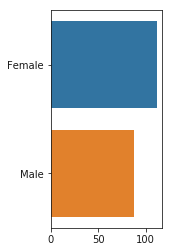

In [45]:
# we have more females than males.
f, ax = plt.subplots(figsize=(2, 4))

sns.barplot(x=[female_total, male_total], y=["Female", "Male"], label="Total")

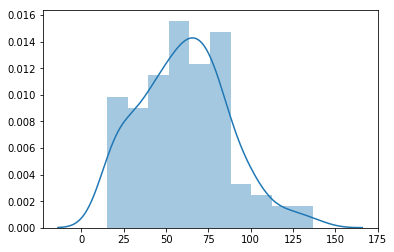

In [23]:
# Annual income peaks at around 60k.
sns.distplot(data[["Annual Income (k$)"]])

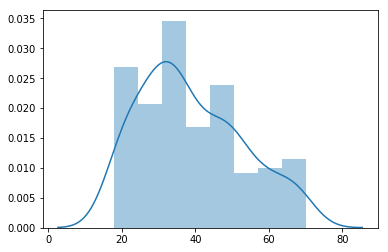

In [24]:
# Age peaks around 35.
sns.distplot(data[["Age"]])

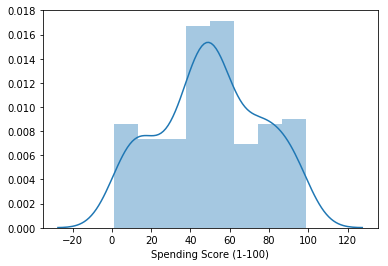

In [25]:
# The most common spending score is between 40-60.
sns.distplot(data["Spending Score (1-100)"])

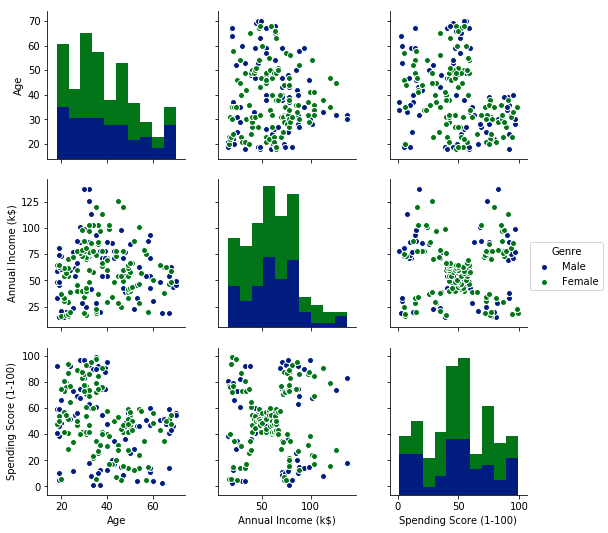

In [32]:
# Plotting between pairs of attributes show us if there are any correlations.
sns.pairplot(data=data[["Genre", "Age", "Annual Income (k$)", "Spending Score (1-100)"]], hue="Genre", palette="dark")

In [5]:
# K-means expects the values to be numeric, so we convert Male =1 and Female = 2 into a new column.
data["Gender"] = data.apply(lambda row: 1 if (row[0] == "Male") else 2, axis=1)
data["CustomerID"] = pd.to_numeric(data["CustomerID"])

In [6]:
# Drop the Gender column with character values as we now have a new numeric value column Gender.
data.drop("Genre", inplace=True, axis=1)

In [7]:
# We don't want CustomerID to be used in K-means, change it into index column so we can identify the customer.
data.set_index("CustomerID", inplace=True)

### What is K-Means?

K-Means is an unsupervised learning algorithm where the dataset is grouped into n clusters based on some kind of similarity/distance measure. The steps are:  
1. Assigne random n centroids.  
2. Calculate distance of each data point from the centroids and assign the data point to the nearest centroid.  
3. Recalculate every centroid by taking the average distance between all points in a centroid.
4. Repeat steps 2 and 3 until there is no change in assignments.

[TowardsDataScience](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a)




In [8]:
# Initialise an arry to store number of clusters.
cluster = []
# Initialise an array to store squared sum of distances for each cluster size.
result = []

# Try cluster size 2 to 10.
for num_clusters in range(2, 10):
    km = KMeans(n_clusters=num_clusters, random_state=0)
    km.fit(data)

    cluster.append(num_clusters)
    # inertia_ stores the squared sum of distances between data points for the cluster size.
    result.append(km.inertia_)

### How to use the Elbow method to determine number of clusters.

Often it is hard to determine the number of clusters for K-Means. Intuition behind elbow method is to find the number of clusters where the distance between the centroids and the data points is not very high while also trying to assign the data points to various clusters. 

In this method, we plot the "Number of clusters" (X) vs the "Sum of squared distances" (Y). The point at which the the SSE begins to flatten out is a good choice. In this case 5 or 6 might be good choices.

Text(0,0.5,'Squared sum of distance')

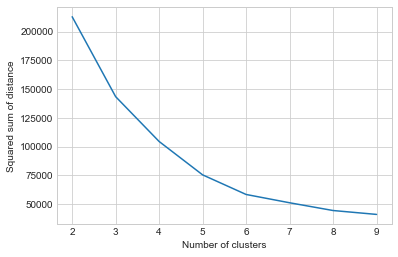

In [71]:
# Plot the number of clusters vs squared sum of distances.
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()

ax.plot(cluster, result)
plt.xlabel("Number of clusters")
plt.ylabel("Squared sum of distance")

In [9]:
# Set the cluster at 6 and fit and predict the data. 
km = KMeans(n_clusters=6, random_state=0)
km.fit(data)
# Each of the data points will have a cluster number assigned to it, this is stored in a new column - k_means.
data["k_means"] = km.predict(data) 

In [12]:
# Check how many data points have been assigned to each of the clusters [0-5]
data.k_means.value_counts()

1    45
3    39
0    38
2    35
4    22
5    21
Name: k_means, dtype: int64

Text(0,0.5,'Spending Score')

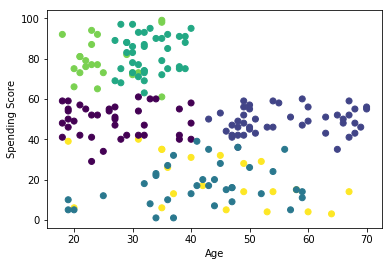

In [15]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(x=data["Age"], y=data["Spending Score (1-100)"], c=data["k_means"])
plt.xlabel("Age")
plt.ylabel("Spending Score")

Text(0,0.5,'Annual Income')

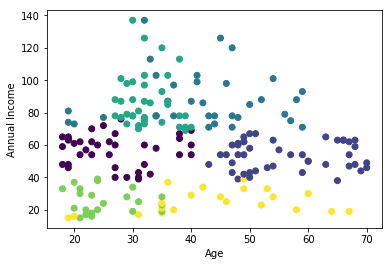

In [16]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(x=data["Age"], y=data["Annual Income (k$)"], c=data["k_means"])
plt.xlabel("Age")
plt.ylabel("Annual Income")

Text(0,0.5,'Annual Income')

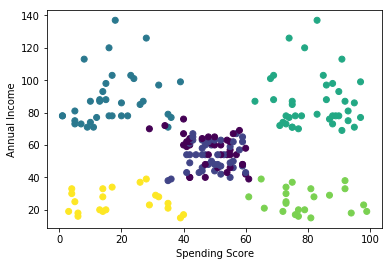

In [17]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(x=data["Spending Score (1-100)"], y=data["Annual Income (k$)"], c=data["k_means"])
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")

### Conclusion

K-Means is a popular clustering algorithm and it can help segment data. The plots above help visualise the clustering for each pair of attributes. 